# Basic Model

## Prepare training data

In [1]:
import pandas as pd
import sys,os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [4]:
image_path = "D:/Projects/CK_plus/datasets/images"
label_path = "D:/Projects/CK_plus/datasets/Emotion"
image_target_path = "D:/Projects/CK_plus/datasets/target_images"

# image_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/cohn-kanade-images"
# label_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/Emotion"
# image_target_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/images"

In [5]:
img_data = pd.read_csv("CSV/img_data.csv")
img_data = img_data[['img_id','em_id','emotion','img_num']]
img_data.head()

,img_id,em_id,emotion,img_num
0,S005_001_00000007,S005_001_00000011,3,11
1,S005_001_00000008,S005_001_00000011,3,11
2,S005_001_00000009,S005_001_00000011,3,11
3,S005_001_00000010,S005_001_00000011,3,11
4,S005_001_00000011,S005_001_00000011,3,11


In [6]:
# Anger,Contempt, Disgust, Fear, Happy, Sadness and Surprise.
emotions_dict = {1:"An",2:"Con",3:"Di",4:"Fe",5:"Ha",6:"Sa",7:"Sur"}
emotions_dict

{1: 'An', 2: 'Con', 3: 'Di', 4: 'Fe', 5: 'Ha', 6: 'Sa', 7: 'Sur'}

In [7]:
img_data['emotion']=img_data.emotion.apply(lambda em:emotions_dict[em])
img_data.head()

,img_id,em_id,emotion,img_num
0,S005_001_00000007,S005_001_00000011,Di,11
1,S005_001_00000008,S005_001_00000011,Di,11
2,S005_001_00000009,S005_001_00000011,Di,11
3,S005_001_00000010,S005_001_00000011,Di,11
4,S005_001_00000011,S005_001_00000011,Di,11


In [8]:

img_data['name']=img_data.img_id.apply(lambda id: id+".png")
img_data.head()

,img_id,em_id,emotion,img_num,name
0,S005_001_00000007,S005_001_00000011,Di,11,S005_001_00000007.png
1,S005_001_00000008,S005_001_00000011,Di,11,S005_001_00000008.png
2,S005_001_00000009,S005_001_00000011,Di,11,S005_001_00000009.png
3,S005_001_00000010,S005_001_00000011,Di,11,S005_001_00000010.png
4,S005_001_00000011,S005_001_00000011,Di,11,S005_001_00000011.png


In [9]:
train_index = np.random.rand(len(img_data)) < 0.8
train_set = img_data[train_index].copy()
val_set = img_data[~train_index].copy()

In [10]:
print("train_set_num=",len(train_set))
print("test_set_num=",len(val_set))
print("total_set_num=",len(img_data))

train_set_num= 1346
test_set_num= 289
total_set_num= 1635


In [11]:
train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()

In [12]:
val_set.head()

,img_id,em_id,emotion,img_num,name
1,S005_001_00000008,S005_001_00000011,Di,11,S005_001_00000008.png
4,S005_001_00000011,S005_001_00000011,Di,11,S005_001_00000011.png
11,S010_004_00000016,S010_004_00000019,An,19,S010_004_00000016.png
13,S010_004_00000018,S010_004_00000019,An,19,S010_004_00000018.png
23,S011_001_00000015,S011_001_00000016,Sur,16,S011_001_00000015.png


In [13]:
batch_size=16
width = 480
hight = 480
train_generator =  train_gen.flow_from_dataframe(train_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              class_mode="categorical",  
                              batch_size=batch_size, shuffle=True)

Found 1315 images belonging to 7 classes.


In [14]:
imge, label = train_generator.next()
print(label)

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [15]:
validation_generator = val_gen.flow_from_dataframe(val_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              batch_size=batch_size, shuffle=True,
                              class_mode="categorical",
                              save_format='png')

Found 283 images belonging to 7 classes.


In [16]:
import keras
from keras import applications

resnet50 = applications.resnet50.ResNet50(include_top=False,input_shape=(width,hight,3))


Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [18]:
resnet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 480, 480, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 486, 486, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 240, 240, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 240, 240, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [22]:
layer_num = len(resnet50.layers)
for i in range(layer_num):
    if i < layer_num-8:
        resnet50.layers[i].trainable = False

for layer in resnet50.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(resnet50)
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 15, 15, 2048)      23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 15, 15, 32)        65568     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 50407     
Total params: 23,703,687
Trainable params: 3,531,527
Non-trainable params: 20,172,160
_________________________________________________________________


In [26]:
model.fit_generator(
        generator=train_generator,
        steps_per_epoch=64//batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=64//batch_size
)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4/4 [==============================] - 92s 23s/step - loss: 4.3315 - categorical_accuracy: 0.2500 - val_loss: 3.6140 - val_categorical_accuracy: 0.1562
Epoch 2/10
4/4 [==============================] - 94s 23s/step - loss: 2.8439 - categorical_accuracy: 0.4375 - val_loss: 3.0847 - val_categorical_accuracy: 0.2031
Epoch 3/10
4/4 [==============================] - 92s 23s/step - loss: 2.1181 - categorical_accuracy: 0.4375 - val_loss: 1.8863 - val_categorical_accuracy: 0.3750
Epoch 4/10
4/4 [==============================] - 91s 23s/step - loss: 1.6051 - categorical_accuracy: 0.5781 - val_loss: 1.6548 - val_categorical_accuracy: 0.4375
Epoch 5/10
4/4 [==============================] - 86s 21s/step - loss: 1.1591 - categorical_accuracy: 0.6094 - val_loss: 2.1522 - val_categorical_accuracy: 0.2881
Epoch 6/10
4/4 [==============================] - 91s 23s/step - loss: 1.1938 - categorical_accuracy: 0.6094 - val_loss: 1.7708 - val_cat

In [27]:
history = model.history

In [28]:
history.history

{'val_loss': [3.6139650344848633,
  3.0847145915031433,
  1.8863070011138916,
  1.6547735929489136,
  2.1522424382678533,
  1.7707609832286835,
  1.8235490918159485,
  1.5293152928352356,
  1.9669455552505235,
  3.5260467529296875],
 'val_categorical_accuracy': [0.15625,
  0.203125,
  0.375,
  0.4375,
  0.2881355947357113,
  0.328125,
  0.390625,
  0.46875,
  0.5254237267930629,
  0.28125],
 'loss': [4.331481575965881,
  2.8438597321510315,
  2.1180664896965027,
  1.6051021814346313,
  1.1590638607740402,
  1.1938183009624481,
  0.7882994264364243,
  0.7923513203859329,
  0.577223651111126,
  0.45113569870591164],
 'categorical_accuracy': [0.25,
  0.4375,
  0.4375,
  0.578125,
  0.609375,
  0.609375,
  0.765625,
  0.734375,
  0.828125,
  0.890625]}

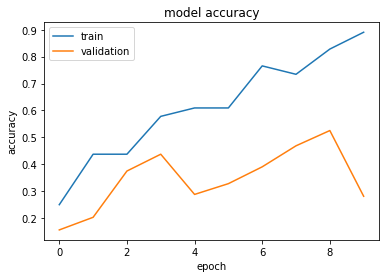

In [29]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

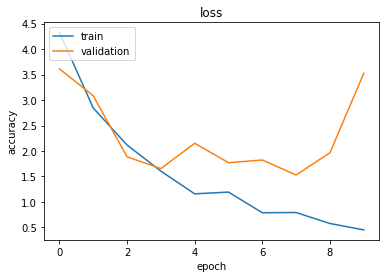

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
print(model.predict_classes)

<bound method Sequential.predict_classes of <keras.engine.sequential.Sequential object at 0x0000022A7B8848D0>>


In [36]:
test_index = np.random.rand(len(val_set)) < 0.5
test_set = val_set[test_index].copy()
test_generator =  train_gen.flow_from_dataframe(test_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              class_mode="categorical",  
                              batch_size=batch_size, shuffle=True)

Found 137 images belonging to 7 classes.


In [34]:
test_label = []
for i in range(1):
    image, label = next(test_generator)
    print(label)
    

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [37]:
prediction = model.predict_generator(test_generator,steps=len(test_set)/batch_size,verbose=0)

In [38]:
test_generator.class_indices

{'An': 0, 'Con': 1, 'Di': 2, 'Fe': 3, 'Ha': 4, 'Sa': 5, 'Sur': 6}

In [39]:
# y_true = np.array(test_generator.classes) + 1
# y_true_label = []
# for i in y_true:
#     y_true_label.append(emotions_dict[i])
# y_pred = np.argmax(prediction,axis=1)
# y_pred = y_pred+1
# y_pred_label = []
# for i in y_pred:
#     y_pred_label.append(emotions_dict[i])


In [40]:
y_pred = np.argmax(prediction,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Confusion Matrix
[[ 0  0  1  0 22  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  4  0 26  0  1]
 [ 0  0  0  0  9  0  1]
 [ 0  0  1  0 23  0  5]
 [ 0  0  1  0 10  0  2]
 [ 0  0  2  0 24  0  3]]
